<a href="https://colab.research.google.com/github/priyanshj125/DeepGraphCNNModel-for-stoke-prediction/blob/main/stockpredictionusing_gcn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

# List of 28 Fortune 500 company stock symbols
equity_symbols = [
    'AAPL', 'AMZN', 'BA', 'BAC', 'CAH', 'COST', 'CVS', 'PCAR', 'PSX', 'T',
    'UNH', 'UNP', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM', 'IBM', 'MSFT', 'GOOGL',
    'JPM', 'GS', 'PEP', 'KO', 'ORCL', 'CSCO', 'INTC', 'MMM'
]

# Fetch adjusted close prices from Yahoo Finance
print("Retrieving equity price data...")
try:
    # Explicitly set auto_adjust=False to ensure 'Adj Close' is available
    equity_prices = yf.download(
        equity_symbols,
        start='2010-01-01',
        end='2025-06-01',
        auto_adjust=False,
        progress=False
    )['Adj Close']
except KeyError as e:
    print(f"Error: Column not found - {e}. Trying 'Close' column...")
    try:
        equity_prices = yf.download(
            equity_symbols,
            start='2010-01-01',
            end='2025-06-01',
            auto_adjust=False,
            progress=False
        )['Close']
    except Exception as e:
        print(f"Failed to fetch data: {e}")
        exit(1)
except Exception as e:
    print(f"Failed to fetch data: {e}")
    exit(1)

# Validate data
if equity_prices.empty or equity_prices.isna().all().all():
    print("No valid data retrieved. Please check symbols or date range.")
    exit(1)

# Clean column names
equity_prices.columns.name = None

# Convert to DataFrame with Date as a column
equity_df = equity_prices.reset_index()

# Display preview
print("\nEquity price data preview:")
print(equity_df.head())

# Prepare chart data (first 5 symbols for clarity)
chart_symbols = equity_symbols[:5]
chart_df = equity_df[['Date'] + chart_symbols].dropna()

# Format dates for Chart.js
chart_dates = chart_df['Date'].dt.strftime('%Y-%m-%d').tolist()



print("```")

Retrieving equity price data...

Equity price data preview:
        Date      AAPL    AMZN         BA        BAC        CAH       COST  \
0 2010-01-04  6.424603  6.6950  43.777557  12.300467  21.750435  42.221558   
1 2010-01-05  6.435712  6.7345  45.211346  12.700292  21.556534  42.093620   
2 2010-01-06  6.333344  6.6125  46.582809  12.849245  21.202158  42.640854   
3 2010-01-07  6.321636  6.5000  48.468552  13.272586  21.195469  42.434738   
4 2010-01-08  6.363664  6.6760  48.001022  13.154993  21.128614  42.129150   

        CSCO        CVS      GOOGL  ...        PEP  PSX         T        UNH  \
0  16.158169  22.696707  15.590931  ...  38.708939  NaN  6.896145  24.919048   
1  16.086180  22.607244  15.522273  ...  39.176674  NaN  6.862366  24.879532   
2  15.981461  22.407661  15.130976  ...  38.784790  NaN  6.794952  25.124542   
3  16.053453  23.233503  14.778734  ...  38.538273  NaN  6.718660  26.088730   
4  16.138533  23.398670  14.975753  ...  38.411861  NaN  6.669437  25.8

In [3]:
import yfinance as yf
import pandas as pd

# Fortune 500 sample tickers
tickers = [
    "AAPL","AMZN","BA","BAC","CAH","COST","CVS",
    "PCAR","PSX","T","UNH","UNP","VZ","WBA","WFC","WMT","XOM","IBM",
    "MSFT","GOOGL","JPM","GS","PEP","KO","ORCL","CSCO","INTC","MMM"
]

# Download Adjusted Close prices only
data = yf.download(tickers, start="2010-01-01", end="2025-06-01")["Close"]

# Ensure columns are flat (drop the MultiIndex names like 'Ticker')
data.columns.name = None

# Reset index
df = data.reset_index()

# Preview
print(df.head())


/tmp/ipython-input-1011229468.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2010-01-01", end="2025-06-01")["Close"]
[*********************100%***********************]  28 of 28 completed


        Date      AAPL    AMZN         BA        BAC        CAH       COST  \
0 2010-01-04  6.424603  6.6950  43.777557  12.300467  21.750435  42.221558   
1 2010-01-05  6.435712  6.7345  45.211346  12.700292  21.556534  42.093620   
2 2010-01-06  6.333344  6.6125  46.582809  12.849245  21.202158  42.640854   
3 2010-01-07  6.321636  6.5000  48.468552  13.272586  21.195469  42.434738   
4 2010-01-08  6.363664  6.6760  48.001022  13.154993  21.128614  42.129150   

        CSCO        CVS      GOOGL  ...        PEP  PSX         T        UNH  \
0  16.158169  22.696707  15.590931  ...  38.708939  NaN  6.896145  24.919048   
1  16.086180  22.607244  15.522273  ...  39.176674  NaN  6.862366  24.879532   
2  15.981461  22.407661  15.130976  ...  38.784790  NaN  6.794952  25.124542   
3  16.053453  23.233503  14.778734  ...  38.538273  NaN  6.718660  26.088730   
4  16.138533  23.398670  14.975753  ...  38.411861  NaN  6.669437  25.843737   

         UNP         VZ        WBA        WFC     

In [4]:
print(df.head())       # show first rows
print(df.columns)      # show all column names



        Date      AAPL    AMZN         BA        BAC        CAH       COST  \
0 2010-01-04  6.424603  6.6950  43.777557  12.300467  21.750435  42.221558   
1 2010-01-05  6.435712  6.7345  45.211346  12.700292  21.556534  42.093620   
2 2010-01-06  6.333344  6.6125  46.582809  12.849245  21.202158  42.640854   
3 2010-01-07  6.321636  6.5000  48.468552  13.272586  21.195469  42.434738   
4 2010-01-08  6.363664  6.6760  48.001022  13.154993  21.128614  42.129150   

        CSCO        CVS      GOOGL  ...        PEP  PSX         T        UNH  \
0  16.158169  22.696707  15.590931  ...  38.708939  NaN  6.896145  24.919048   
1  16.086180  22.607244  15.522273  ...  39.176674  NaN  6.862366  24.879532   
2  15.981461  22.407661  15.130976  ...  38.784790  NaN  6.794952  25.124542   
3  16.053453  23.233503  14.778734  ...  38.538273  NaN  6.718660  26.088730   
4  16.138533  23.398670  14.975753  ...  38.411861  NaN  6.669437  25.843737   

         UNP         VZ        WBA        WFC     

In [5]:
import pandas as pd



# 1. Convert Date field to datetime
df["Date"] = pd.to_datetime(df["Date"])

# 2. Sort by ticker & date (useful if we have multiple companies in one file)
df = df.sort_values(by=["Date"], ascending=True)

# 3. Handle missing/null values
# Forward fill missing values, then backward fill (in case of NaN at start)
df = df.fillna(method="ffill").fillna(method="bfill")

# 4. Ensure correct data types
df["Date"] = pd.to_datetime(df["Date"])
for col in df.columns:
    if col != "Date":
        df[col] = pd.to_numeric(df[col], errors="coerce")

print(df.head())
print(df.info())


        Date      AAPL    AMZN         BA        BAC        CAH       COST  \
0 2010-01-04  6.424603  6.6950  43.777557  12.300467  21.750435  42.221558   
1 2010-01-05  6.435712  6.7345  45.211346  12.700292  21.556534  42.093620   
2 2010-01-06  6.333344  6.6125  46.582809  12.849245  21.202158  42.640854   
3 2010-01-07  6.321636  6.5000  48.468552  13.272586  21.195469  42.434738   
4 2010-01-08  6.363664  6.6760  48.001022  13.154993  21.128614  42.129150   

        CSCO        CVS      GOOGL  ...        PEP        PSX         T  \
0  16.158169  22.696707  15.590931  ...  38.708939  21.668587  6.896145   
1  16.086180  22.607244  15.522273  ...  39.176674  21.668587  6.862366   
2  15.981461  22.407661  15.130976  ...  38.784790  21.668587  6.794952   
3  16.053453  23.233503  14.778734  ...  38.538273  21.668587  6.718660   
4  16.138533  23.398670  14.975753  ...  38.411861  21.668587  6.669437   

         UNH        UNP         VZ        WBA        WFC        WMT        XOM  

/tmp/ipython-input-3690708764.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill").fillna(method="bfill")


In [6]:
import pandas as pd

# 1. Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# 2. Sort by Date
df = df.sort_values("Date").reset_index(drop=True)

# 3. Convert all price columns (everything except Date) to numeric
for col in df.columns:
    if col != "Date":
        df[col] = pd.to_numeric(df[col], errors="coerce")  # coerce will turn bad strings into NaN

# 4. Check for missing values
print("Any NaNs in dataset? ", df.isna().values.any())
print("Columns with NaN count:\n", df.isna().sum())

# 5. Fill missing values
# Option A: Forward + Backward fill
df_filled = df.ffill().bfill()

# Option B: Linear Interpolation
df_interp = df.interpolate(method="linear", axis=0)

# 6. Final check
print("Remaining NaNs after ffill+bfill:", df_filled.isna().sum().sum())
print("Remaining NaNs after interpolation:", df_interp.isna().sum().sum())



Any NaNs in dataset?  False
Columns with NaN count:
 Date     0
AAPL     0
AMZN     0
BA       0
BAC      0
CAH      0
COST     0
CSCO     0
CVS      0
GOOGL    0
GS       0
IBM      0
INTC     0
JPM      0
KO       0
MMM      0
MSFT     0
ORCL     0
PCAR     0
PEP      0
PSX      0
T        0
UNH      0
UNP      0
VZ       0
WBA      0
WFC      0
WMT      0
XOM      0
dtype: int64
Remaining NaNs after ffill+bfill: 0
Remaining NaNs after interpolation: 0


In [7]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)

print("Remaining columns:", df.columns)


Remaining columns: Index(['Date', 'AAPL', 'AMZN', 'BA', 'BAC', 'CAH', 'COST', 'CSCO', 'CVS',
       'GOOGL', 'GS', 'IBM', 'INTC', 'JPM', 'KO', 'MMM', 'MSFT', 'ORCL',
       'PCAR', 'PEP', 'PSX', 'T', 'UNH', 'UNP', 'VZ', 'WBA', 'WFC', 'WMT',
       'XOM'],
      dtype='object')


In [8]:
df

,Date,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
0,2010-01-04,6.424603,6.695000,43.777557,12.300467,21.750435,42.221558,16.158169,22.696707,15.590931,...,38.708939,21.668587,6.896145,24.919048,23.455729,13.987558,22.702438,18.120777,12.986790,38.213131
1,2010-01-05,6.435712,6.734500,45.211346,12.700292,21.556534,42.093620,16.086180,22.607244,15.522273,...,39.176674,21.668587,6.862366,24.879532,23.782152,14.012771,22.519842,18.618229,12.857471,38.362324
2,2010-01-06,6.333344,6.612500,46.582809,12.849245,21.202158,42.640854,15.981461,22.407661,15.130976,...,38.784790,21.668587,6.794952,25.124542,23.818020,13.609852,22.349424,18.644768,12.828732,38.693905
3,2010-01-07,6.321636,6.500000,48.468552,13.272586,21.195469,42.434738,16.053453,23.233503,14.778734,...,38.538273,21.668587,6.718660,26.088730,23.606382,13.528840,22.483320,19.321304,12.835915,38.572338
4,2010-01-08,6.363664,6.676000,48.001022,13.154993,21.128614,42.129150,16.138533,23.398670,14.975753,...,38.411861,21.668587,6.669437,25.843737,24.406300,13.537371,22.513750,19.142225,12.771264,38.417595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,2025-05-23,195.048645,200.990005,202.360001,42.946915,152.285385,1007.104736,62.732758,60.173740,168.266296,...,127.936211,112.024857,27.148727,293.486603,220.772400,42.630703,11.170000,72.404648,96.115509,102.080101
3872,2025-05-27,199.983047,206.020004,201.029999,43.960938,154.209503,1016.381897,63.368931,60.678238,172.690933,...,129.944168,113.213135,27.119024,292.920593,222.998917,42.807838,11.210000,73.557869,97.352623,102.565582
3873,2025-05-28,200.192795,204.720001,201.500000,43.801876,152.664230,1011.738342,62.961380,61.776264,172.151596,...,129.251770,111.668373,27.227936,296.008667,220.841980,42.443726,11.190000,73.299393,97.013412,101.168587
3874,2025-05-29,199.723328,205.699997,208.179993,43.980824,153.521622,1007.344421,62.673115,62.102699,171.652191,...,130.488205,113.559715,27.109123,296.068268,221.169998,42.640545,11.240000,74.074837,96.873741,101.743240


In [9]:
df_s_transpose = df

try:
  df_s_transpose = df_s_transpose.interpolate(inplace = False)
except:
  print("An exception occurred. Operation ignored")
  exit


In [10]:
# check if any value is null
df_s_transpose.isnull().values.any()


np.False_

In [11]:
# check if any column (axis=1) is null
df_s_transpose[df_s_transpose.isna().any(axis = 1)]


,Date,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM


In [12]:
df_s_transpose

,Date,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
0,2010-01-04,6.424603,6.695000,43.777557,12.300467,21.750435,42.221558,16.158169,22.696707,15.590931,...,38.708939,21.668587,6.896145,24.919048,23.455729,13.987558,22.702438,18.120777,12.986790,38.213131
1,2010-01-05,6.435712,6.734500,45.211346,12.700292,21.556534,42.093620,16.086180,22.607244,15.522273,...,39.176674,21.668587,6.862366,24.879532,23.782152,14.012771,22.519842,18.618229,12.857471,38.362324
2,2010-01-06,6.333344,6.612500,46.582809,12.849245,21.202158,42.640854,15.981461,22.407661,15.130976,...,38.784790,21.668587,6.794952,25.124542,23.818020,13.609852,22.349424,18.644768,12.828732,38.693905
3,2010-01-07,6.321636,6.500000,48.468552,13.272586,21.195469,42.434738,16.053453,23.233503,14.778734,...,38.538273,21.668587,6.718660,26.088730,23.606382,13.528840,22.483320,19.321304,12.835915,38.572338
4,2010-01-08,6.363664,6.676000,48.001022,13.154993,21.128614,42.129150,16.138533,23.398670,14.975753,...,38.411861,21.668587,6.669437,25.843737,24.406300,13.537371,22.513750,19.142225,12.771264,38.417595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,2025-05-23,195.048645,200.990005,202.360001,42.946915,152.285385,1007.104736,62.732758,60.173740,168.266296,...,127.936211,112.024857,27.148727,293.486603,220.772400,42.630703,11.170000,72.404648,96.115509,102.080101
3872,2025-05-27,199.983047,206.020004,201.029999,43.960938,154.209503,1016.381897,63.368931,60.678238,172.690933,...,129.944168,113.213135,27.119024,292.920593,222.998917,42.807838,11.210000,73.557869,97.352623,102.565582
3873,2025-05-28,200.192795,204.720001,201.500000,43.801876,152.664230,1011.738342,62.961380,61.776264,172.151596,...,129.251770,111.668373,27.227936,296.008667,220.841980,42.443726,11.190000,73.299393,97.013412,101.168587
3874,2025-05-29,199.723328,205.699997,208.179993,43.980824,153.521622,1007.344421,62.673115,62.102699,171.652191,...,130.488205,113.559715,27.109123,296.068268,221.169998,42.640545,11.240000,74.074837,96.873741,101.743240


In [13]:
# Make a copy of df_s
df_s_transpose = df.copy()

# Define the flag (1 = drop columns with NA, 0 = keep them)
drop_cols_with_na = 1

# Drop columns with missing values if the flag is enabled
if drop_cols_with_na == 1:
    df_s_transpose = df_s_transpose.dropna(axis=1)

print(df_s_transpose.shape)
df_s_transpose.head()


(3876, 29)


,Date,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
0,2010-01-04,6.424603,6.6950,43.777557,12.300467,21.750435,42.221558,16.158169,22.696707,15.590931,...,38.708939,21.668587,6.896145,24.919048,23.455729,13.987558,22.702438,18.120777,12.986790,38.213131
1,2010-01-05,6.435712,6.7345,45.211346,12.700292,21.556534,42.093620,16.086180,22.607244,15.522273,...,39.176674,21.668587,6.862366,24.879532,23.782152,14.012771,22.519842,18.618229,12.857471,38.362324
2,2010-01-06,6.333344,6.6125,46.582809,12.849245,21.202158,42.640854,15.981461,22.407661,15.130976,...,38.784790,21.668587,6.794952,25.124542,23.818020,13.609852,22.349424,18.644768,12.828732,38.693905
3,2010-01-07,6.321636,6.5000,48.468552,13.272586,21.195469,42.434738,16.053453,23.233503,14.778734,...,38.538273,21.668587,6.718660,26.088730,23.606382,13.528840,22.483320,19.321304,12.835915,38.572338
4,2010-01-08,6.363664,6.6760,48.001022,13.154993,21.128614,42.129150,16.138533,23.398670,14.975753,...,38.411861,21.668587,6.669437,25.843737,24.406300,13.537371,22.513750,19.142225,12.771264,38.417595


In [14]:
# further check and verify
df_s_transpose.isnull().values.any()
df_s_transpose[df_s_transpose.isna().any( axis = 1 )]

,Date,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM


In [15]:
df_s_transpose_pearson = df_s_transpose.corr(method = 'pearson', numeric_only = True)
df_s_transpose_pearson

,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,GS,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
AAPL,1.000000,0.925797,0.327010,0.888549,0.761387,0.966846,0.888023,0.505918,0.976751,0.934866,...,0.927594,0.809806,0.678017,0.960457,0.939306,0.624384,-0.420425,0.644377,0.943904,0.761384
AMZN,0.925797,1.000000,0.522223,0.930365,0.644211,0.901154,0.938381,0.486304,0.953660,0.878254,...,0.893636,0.780257,0.757401,0.914993,0.952963,0.801344,-0.281406,0.639766,0.914461,0.554925
BA,0.327010,0.522223,1.000000,0.605474,0.212430,0.319725,0.670742,0.386987,0.419720,0.349043,...,0.526554,0.581458,0.590999,0.476717,0.566389,0.723479,0.331583,0.534678,0.369891,0.189615
BAC,0.888549,0.930365,0.605474,1.000000,0.639575,0.873984,0.950609,0.572050,0.935455,0.912916,...,0.896028,0.823361,0.774828,0.914924,0.944182,0.771573,-0.159390,0.765646,0.873188,0.616099
CAH,0.761387,0.644211,0.212430,0.639575,1.000000,0.837625,0.653160,0.538165,0.758843,0.833321,...,0.697269,0.833139,0.716855,0.703538,0.684776,0.449713,-0.162900,0.818137,0.817345,0.843551
COST,0.966846,0.901154,0.319725,0.873984,0.837625,1.000000,0.868638,0.454099,0.961936,0.962800,...,0.874537,0.852893,0.741133,0.914725,0.901362,0.612854,-0.438474,0.737294,0.978863,0.807627
CSCO,0.888023,0.938381,0.670742,0.950609,0.653160,0.868638,1.000000,0.563426,0.921846,0.864467,...,0.925680,0.835989,0.790621,0.926056,0.957109,0.807007,-0.159596,0.719022,0.881886,0.621364
CVS,0.505918,0.486304,0.386987,0.572050,0.538165,0.454099,0.563426,1.000000,0.539392,0.484818,...,0.668505,0.577104,0.592463,0.605219,0.631377,0.644859,0.467410,0.619725,0.421722,0.432970
GOOGL,0.976751,0.953660,0.419720,0.935455,0.758843,0.961936,0.921846,0.539392,1.000000,0.950662,...,0.924534,0.847467,0.733701,0.951647,0.952505,0.695197,-0.324506,0.724791,0.940642,0.733302
GS,0.934866,0.878254,0.349043,0.912916,0.833321,0.962800,0.864467,0.484818,0.950662,1.000000,...,0.841785,0.840736,0.754039,0.885875,0.876480,0.593424,-0.338265,0.807291,0.950849,0.786537


In [16]:
df_s_transpose_pearson[df_s_transpose_pearson >= 0.5] = 1
df_s_transpose_pearson[df_s_transpose_pearson < 0.5] = 0
df_s_transpose_pearson

,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,GS,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
AAPL,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
AMZN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
BA,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
BAC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CAH,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
COST,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CSCO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CVS,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
GOOGL,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
GS,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [17]:
# make the diagonal element to be zero. No self loop/edge
import numpy as np
np.fill_diagonal(df_s_transpose_pearson.values, 0)
df_s_transpose_pearson

,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,GS,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
AAPL,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
AMZN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
BA,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
BAC,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CAH,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
COST,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CSCO,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CVS,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
GOOGL,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
GS,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


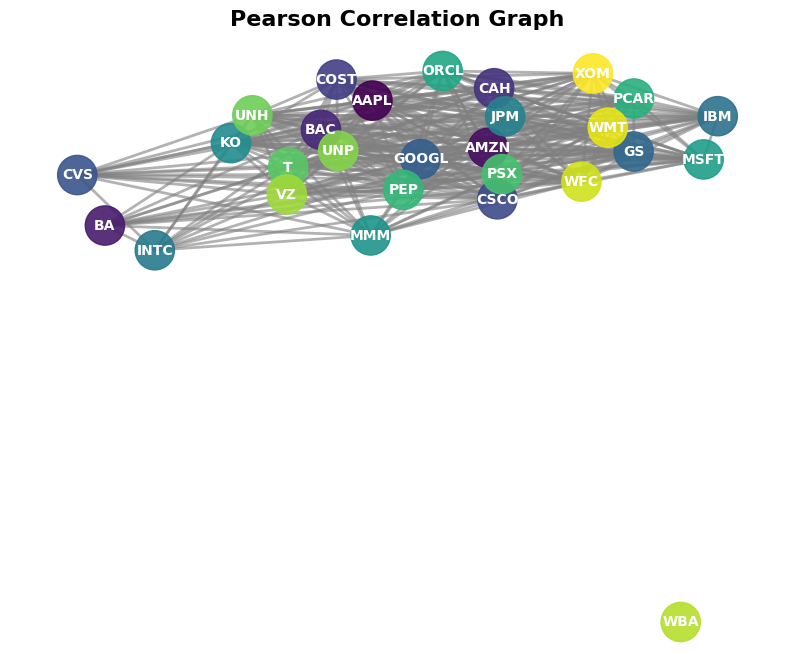

In [18]:
import networkx as nx
Graph_pearson = nx.Graph(df_s_transpose_pearson)


import matplotlib.pyplot as plt
import networkx as nx

# Example: using your Graph_pearson
plt.figure(figsize=(10, 8))

# Positions (spring layout is usually prettier than circular)
pos = nx.spring_layout(Graph_pearson, k=0.5, seed=42)

# Draw nodes
nx.draw_networkx_nodes(
    Graph_pearson,
    pos,
    node_size=800,
    node_color=range(len(Graph_pearson)),
    cmap=plt.cm.viridis,
    alpha=0.9
)

# Draw edges with transparency & width
nx.draw_networkx_edges(
    Graph_pearson,
    pos,
    edge_color='gray',
    width=2,
    alpha=0.6
)

# Draw labels
nx.draw_networkx_labels(
    Graph_pearson,
    pos,
    font_size=10,
    font_color="white",
    font_weight="bold"
)

plt.title("Pearson Correlation Graph", fontsize=16, fontweight="bold")
plt.axis("off")
plt.show()


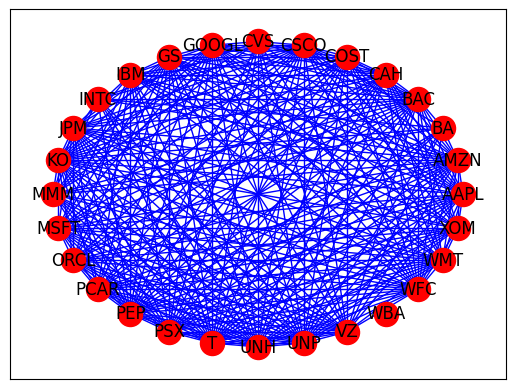

In [19]:

nx.draw_networkx(Graph_pearson, pos = nx.circular_layout( Graph_pearson ), node_color = 'r', edge_color = 'b')

In [20]:
df_s_transpose.corr(method = 'pearson', numeric_only = True)
#df_s_transpose[[{1,2,3}]]

df_s_transpose.iloc[:, 0:10]

,Date,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL
0,2010-01-04,6.424603,6.695000,43.777557,12.300467,21.750435,42.221558,16.158169,22.696707,15.590931
1,2010-01-05,6.435712,6.734500,45.211346,12.700292,21.556534,42.093620,16.086180,22.607244,15.522273
2,2010-01-06,6.333344,6.612500,46.582809,12.849245,21.202158,42.640854,15.981461,22.407661,15.130976
3,2010-01-07,6.321636,6.500000,48.468552,13.272586,21.195469,42.434738,16.053453,23.233503,14.778734
4,2010-01-08,6.363664,6.676000,48.001022,13.154993,21.128614,42.129150,16.138533,23.398670,14.975753
...,...,...,...,...,...,...,...,...,...,...
3871,2025-05-23,195.048645,200.990005,202.360001,42.946915,152.285385,1007.104736,62.732758,60.173740,168.266296
3872,2025-05-27,199.983047,206.020004,201.029999,43.960938,154.209503,1016.381897,63.368931,60.678238,172.690933
3873,2025-05-28,200.192795,204.720001,201.500000,43.801876,152.664230,1011.738342,62.961380,61.776264,172.151596
3874,2025-05-29,199.723328,205.699997,208.179993,43.980824,153.521622,1007.344421,62.673115,62.102699,171.652191


In [21]:
# Calculate the Pearson correlation matrix using only numeric columns
correlation_matrix = df_s_transpose.corr(method="pearson", numeric_only=True)

# Display correlation values
print("Correlation matrix (first 5 rows):")
print(correlation_matrix.head())

# Select the first 10 columns (all rows included)
subset_df = df_s_transpose.iloc[:, :10]

# Show shape and preview of the subset
print("\nShape of the subset:", subset_df.shape)
print(subset_df.head())


Correlation matrix (first 5 rows):
          AAPL      AMZN        BA       BAC       CAH      COST      CSCO  \
AAPL  1.000000  0.925797  0.327010  0.888549  0.761387  0.966846  0.888023   
AMZN  0.925797  1.000000  0.522223  0.930365  0.644211  0.901154  0.938381   
BA    0.327010  0.522223  1.000000  0.605474  0.212430  0.319725  0.670742   
BAC   0.888549  0.930365  0.605474  1.000000  0.639575  0.873984  0.950609   
CAH   0.761387  0.644211  0.212430  0.639575  1.000000  0.837625  0.653160   

           CVS     GOOGL        GS  ...       PEP       PSX         T  \
AAPL  0.505918  0.976751  0.934866  ...  0.927594  0.809806  0.678017   
AMZN  0.486304  0.953660  0.878254  ...  0.893636  0.780257  0.757401   
BA    0.386987  0.419720  0.349043  ...  0.526554  0.581458  0.590999   
BAC   0.572050  0.935455  0.912916  ...  0.896028  0.823361  0.774828   
CAH   0.538165  0.758843  0.833321  ...  0.697269  0.833139  0.716855   

           UNH       UNP        VZ       WBA       WFC   

In [22]:
df_s_pearson_train = df_s_transpose.iloc[:, 0:15]
df_s_transpose_pearson_train = df_s_pearson_train.corr(method = 'pearson', numeric_only = True)
np.fill_diagonal(df_s_transpose_pearson_train.values, 0)

df_s_transpose_pearson_train[df_s_transpose_pearson_train >= 0.5] = 1
df_s_transpose_pearson_train[df_s_transpose_pearson_train < 0.5] = 0
df_s_transpose_pearson_train

df_s_transpose_pearson_train

,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,GS,IBM,INTC,JPM,KO
AAPL,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
AMZN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
BA,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
BAC,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CAH,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
COST,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
CSCO,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CVS,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
GOOGL,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
GS,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [23]:
df_s_pearson_test = df_s_transpose.iloc[:, 15:23]
df_s_transpose_pearson_test = df_s_pearson_test.corr(method = 'pearson', numeric_only = True)
np.fill_diagonal(df_s_transpose_pearson_test.values, 0)

df_s_transpose_pearson_train[df_s_transpose_pearson_test >= 0.5] = 1
df_s_transpose_pearson_train[df_s_transpose_pearson_test < 0.5] = 0
df_s_transpose_pearson_test


df_s_pearson_validation = df_s_transpose.iloc[:, 23:]
df_s_transpose_pearson_validation = df_s_pearson_validation.corr(method = 'pearson', numeric_only = True)
np.fill_diagonal(df_s_transpose_pearson_validation.values, 0)
df_s_transpose_pearson_validation

df_s_transpose_pearson_validation[df_s_transpose_pearson_validation >= 0.5] = 1
df_s_transpose_pearson_validation[df_s_transpose_pearson_validation < 0.5] = 0
df_s_transpose_pearson_validation

,UNP,VZ,WBA,WFC,WMT,XOM
UNP,0.0,1.0,0.0,1.0,1.0,1.0
VZ,1.0,0.0,0.0,1.0,1.0,0.0
WBA,0.0,0.0,0.0,0.0,0.0,0.0
WFC,1.0,1.0,0.0,0.0,1.0,1.0
WMT,1.0,1.0,0.0,1.0,0.0,1.0
XOM,1.0,0.0,0.0,1.0,1.0,0.0


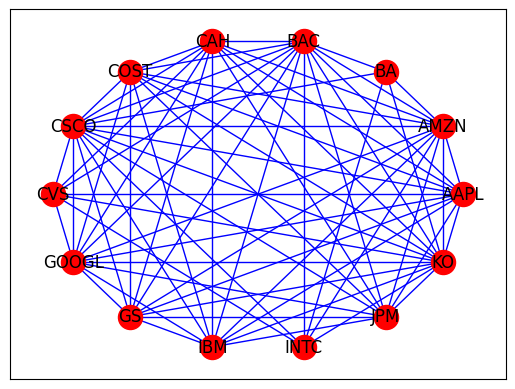

In [24]:
graph_pearson_train = nx.Graph(df_s_transpose_pearson_train)
graph_pearson_test = nx.Graph(df_s_transpose_pearson_test)
graph_pearson_validation = nx.Graph(df_s_transpose_pearson_validation)


nx.draw_networkx(graph_pearson_train, pos = nx.circular_layout( graph_pearson_train ), node_color = 'r', edge_color = 'b')

In [25]:
df_s_pearson_train.corr(numeric_only = True)

,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,GS,IBM,INTC,JPM,KO
AAPL,1.000000,0.925797,0.327010,0.888549,0.761387,0.966846,0.888023,0.505918,0.976751,0.934866,0.721674,0.414061,0.936637,0.943433
AMZN,0.925797,1.000000,0.522223,0.930365,0.644211,0.901154,0.938381,0.486304,0.953660,0.878254,0.609327,0.642036,0.933740,0.904739
BA,0.327010,0.522223,1.000000,0.605474,0.212430,0.319725,0.670742,0.386987,0.419720,0.349043,0.082458,0.787068,0.495410,0.506624
BAC,0.888549,0.930365,0.605474,1.000000,0.639575,0.873984,0.950609,0.572050,0.935455,0.912916,0.588189,0.622103,0.940613,0.906925
CAH,0.761387,0.644211,0.212430,0.639575,1.000000,0.837625,0.653160,0.538165,0.758843,0.833321,0.828667,0.133567,0.807904,0.776574
COST,0.966846,0.901154,0.319725,0.873984,0.837625,1.000000,0.868638,0.454099,0.961936,0.962800,0.830732,0.329502,0.965583,0.936810
CSCO,0.888023,0.938381,0.670742,0.950609,0.653160,0.868638,1.000000,0.563426,0.921846,0.864467,0.569480,0.674443,0.927486,0.927879
CVS,0.505918,0.486304,0.386987,0.572050,0.538165,0.454099,0.563426,1.000000,0.539392,0.484818,0.212358,0.515911,0.476983,0.632885
GOOGL,0.976751,0.953660,0.419720,0.935455,0.758843,0.961936,0.921846,0.539392,1.000000,0.950662,0.712395,0.494269,0.964770,0.944934
GS,0.934866,0.878254,0.349043,0.912916,0.833321,0.962800,0.864467,0.484818,0.950662,1.000000,0.815456,0.325882,0.972631,0.901032


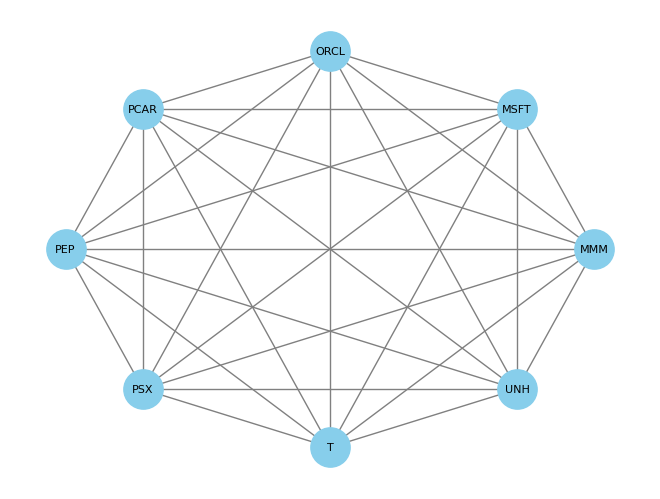

In [26]:
import matplotlib.pyplot as plt
import networkx as nx

# Simple circular graph plot
nx.draw(
    graph_pearson_test,
    pos=nx.circular_layout(graph_pearson_test),
    with_labels=True,
    node_color="skyblue",
    edge_color="gray",
    node_size=800,
    font_size=8
)
plt.show()


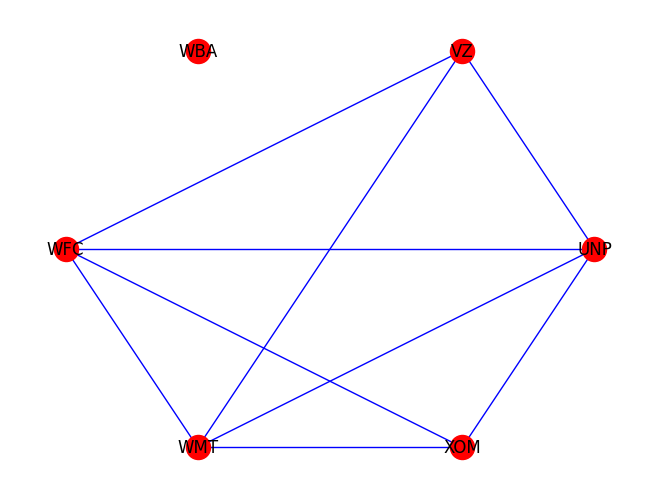

In [27]:
nx.draw(graph_pearson_validation, pos=nx.circular_layout(graph_pearson_validation),
        node_color="red", edge_color="blue", with_labels=True)


In [28]:
# improvement: make sure only stocks/nodes that are in the graph are taken
all_stock_nodes = df_s_transpose_pearson.index.to_list()
all_stock_nodes[:5]

['AAPL', 'AMZN', 'BA', 'BAC', 'CAH']

In [29]:
source = [];
target = [];
edge_feature = [];

for aStock in all_stock_nodes:
    for anotherStock in all_stock_nodes:
        if df_s_transpose_pearson[aStock][anotherStock] > 0:
            #print(df_s_transpose_pearson[aStock][anotherStock])
            source.append(aStock)
            target.append(anotherStock)
            edge_feature.append(1)

# edge feature is not required except for news based graph
source, target, edge_feature

(['AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
 

#change form here


In [30]:
# Initialize empty lists for train, test, and validation graphs
trainSource, trainTarget, trainEdge_feature = [], [], []
testSource, testTarget, testEdge_feature = [], [], []
validationSource, validationTarget, validationEdge_feature = [], [], []

# Convert index to list of nodes
trainNodeList = list(df_s_transpose_pearson_train.index)
testNodeList = list(df_s_transpose_pearson_test.index)
validationNodeList = list(df_s_transpose_pearson_validation.index)

# Construct edges for training graph
for stock1 in trainNodeList:
    for stock2 in trainNodeList:
        if df_s_transpose_pearson_train.at[stock2, stock1] > 0:
            trainSource.append(stock1)
            trainTarget.append(stock2)
            trainEdge_feature.append(1)

# Construct edges for testing graph
for stock1 in testNodeList:
    for stock2 in testNodeList:
        if df_s_transpose_pearson_test.at[stock2, stock1] > 0:
            testSource.append(stock1)
            testTarget.append(stock2)
            testEdge_feature.append(1)

# Construct edges for validation graph
for stock1 in validationNodeList:
    for stock2 in validationNodeList:
        if df_s_transpose_pearson_validation.at[stock2, stock1] > 0:
            validationSource.append(stock1)
            validationTarget.append(stock2)
            validationEdge_feature.append(1)

# Outputs
(trainSource, trainTarget, trainEdge_feature,
 testSource, testTarget, testEdge_feature,
 validationSource, validationTarget, validationEdge_feature)


(['AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'CSCO',
  'CSCO',
  'CSCO',
  'CSCO',
  'CSCO',
  'CSCO',
  'CSCO',
  'CSCO',
  'CSCO',
  'CSCO',
  'CSCO',
  'CSCO',
  'CSCO',
  'CVS',
  'CVS',
  'CVS',
  'CVS',
  'CVS',
  'CVS',
  'CVS',
  'GOOGL',
  'GOOGL',
  'GOOGL',
  'GOOGL',
  'GOOGL',
  'GOOGL',
  'GOOGL',
  'GOOGL',
  'GOOGL',
  'GOOGL',
  'GOOGL',
  'GS',
  'GS',
  'GS',
  'GS',
  'GS',
  'GS',
  'GS',
  'GS',
  'GS',
  'GS',
  'IBM',
  'IBM',
  

In [31]:
!pip install git+https://github.com/VenkateshwaranB/stellargraph.git


  Cloning https://github.com/VenkateshwaranB/stellargraph.git to /tmp/pip-req-build-jw7mdc7i
  Running command git clone --filter=blob:none --quiet https://github.com/VenkateshwaranB/stellargraph.git /tmp/pip-req-build-jw7mdc7i
  Resolved https://github.com/VenkateshwaranB/stellargraph.git to commit efa1f847109a4ba490e7a5105646a20ee09a3243
  Preparing metadata (setup.py) ... done
  Created wheel for stellargraph: filename=stellargraph-1.3.0b0-py3-none-any.whl size=431844 sha256=678cff3ff1aa12639f6968f29349e76aef176938a24460bc8b76a2d8fa26dcda
  Stored in directory: /tmp/pip-ephem-wheel-cache-1t4tslo3/wheels/dc/f2/b8/ac94f45a270c91d5fe3598e87c658e50d20752f4544759cefc
Successfully built stellargraph


In [32]:
# Create DataFrame of Pearson edges (without edge feature)
pearson_edges = pd.DataFrame({
    "source": source,
    "target": target
})

# Create DataFrame of Pearson edges including edge features
pearson_edges_data = pd.DataFrame({
    "source": source,
    "target": target,
    "edge_feature": edge_feature
})

# ----- Train edges -----
pearson_edges_train = pd.DataFrame({
    "source": trainSource,
    "target": trainTarget
})

pearson_edges_data_train = pd.DataFrame({
    "source": trainSource,
    "target": trainTarget,
    "edge_feature": trainEdge_feature
})

# ----- Test edges -----
pearson_edges_test = pd.DataFrame({
    "source": testSource,
    "target": testTarget
})

pearson_edges_data_test = pd.DataFrame({
    "source": testSource,
    "target": testTarget,
    "edge_feature": testEdge_feature
})

# ----- Validation edges -----
pearson_edges_validation = pd.DataFrame({
    "source": validationSource,
    "target": validationTarget
})

# Show first 10 rows for quick inspection
pearson_edges.head(10)


,source,target
0,AAPL,AMZN
1,AAPL,BAC
2,AAPL,CAH
3,AAPL,COST
4,AAPL,CSCO
5,AAPL,CVS
6,AAPL,GOOGL
7,AAPL,GS
8,AAPL,IBM
9,AAPL,JPM


##Integrating Time-Series Data into Node Features for Constructing a GCN-Compatible Feature Matrix

In [33]:
# Reset index to prepare feature dataframe
df_s_transpose_feature = df_s_transpose.reset_index(drop=True, inplace=False)

# Example: accessing specific stock values
df_s_transpose_feature["AAPL"].values

# Collect node features for all stocks
node_Data = []
for stock in all_stock_nodes:
    node_Data.append(df_s_transpose_feature[stock].values)

# Create dataframe of node features (for GNN compatibility)
pearson_graph_node_data = pd.DataFrame(node_Data, index=all_stock_nodes)
pearson_graph_node_data.head()

# Sanity checks
node_Data[14:15]
len(validationNodeList), len(testNodeList)

# ----- Split into train/test/validation -----
pearson_graph_node_data_train = pd.DataFrame(
    node_Data[0:14], index=trainNodeList
)
pearson_graph_node_data_train.head()

pearson_graph_node_data_test = pd.DataFrame(
    node_Data[15:23], index=testNodeList
)
pearson_graph_node_data_test.head()

pearson_graph_node_data_validation = pd.DataFrame(
    node_Data[22:30], index=validationNodeList
)
pearson_graph_node_data_validation.head()


,0,1,2,3,4,5,6,7,8,9,...,3866,3867,3868,3869,3870,3871,3872,3873,3874,3875
UNP,23.455729,23.782152,23.818020,23.606382,24.406300,24.244879,24.173143,24.201836,23.810841,23.520290,...,230.026337,228.117905,226.954956,222.273300,221.527817,220.772400,222.998917,220.841980,221.169998,221.660004
VZ,13.987558,14.012771,13.609852,13.528840,13.537371,13.592797,13.605584,13.588529,13.311390,13.038514,...,43.290043,43.604950,43.516384,43.053860,42.443726,42.630703,42.807838,42.443726,42.640545,43.260517
WBA,22.702438,22.519842,22.349424,22.483320,22.513750,22.550270,22.361591,22.568535,22.586794,22.276381,...,11.290000,11.250000,11.230000,11.180000,11.240000,11.170000,11.210000,11.190000,11.240000,11.250000
WFC,18.120777,18.618229,18.644768,19.321304,19.142225,19.102428,18.624878,18.956507,19.228456,18.624878,...,75.735085,75.615776,75.078934,72.762543,72.961372,72.404648,73.557869,73.299393,74.074837,74.343254
WMT,12.986790,12.857471,12.828732,12.835915,12.771264,12.981997,13.106528,13.173581,12.981997,12.855077,...,98.011078,97.891365,97.572113,96.205299,95.706467,96.115509,97.352623,97.013412,96.873741,98.489967


Building a StellarGraph with Node-Level Feature Integration

In [34]:
from stellargraph import StellarGraph

# Build full Pearson graph with node features
pearson_graph_with_node_features = StellarGraph(
    nodes=pearson_graph_node_data,
    edges=pearson_edges,
    node_type_default="corner",
    edge_type_default="line"
)
print(pearson_graph_with_node_features.info())

# ----- Training graph -----
pearson_train_graph_with_node_features = StellarGraph(
    nodes=pearson_graph_node_data_train,
    edges=pearson_edges_train,
    node_type_default="corner",
    edge_type_default="line"
)
print(pearson_train_graph_with_node_features.info())

# ----- Testing graph -----
pearson_test_graph_with_node_features = StellarGraph(
    nodes=pearson_graph_node_data_test,
    edges=pearson_edges_test,
    node_type_default="corner",
    edge_type_default="line"
)
print(pearson_test_graph_with_node_features.info())

# ----- Validation graph -----
pearson_validation_graph_with_node_features = StellarGraph(
    nodes=pearson_graph_node_data_validation,
    edges=pearson_edges_validation,
    node_type_default="corner",
    edge_type_default="line"
)
print(pearson_validation_graph_with_node_features.info())


StellarGraph: Undirected multigraph
 Nodes: 28, Edges: 604

 Node types:
  corner: [28]
    Features: float32 vector, length 3876
    Edge types: corner-line->corner

 Edge types:
    corner-line->corner: [604]
        Weights: all 1 (default)
        Features: none
StellarGraph: Undirected multigraph
 Nodes: 14, Edges: 142

 Node types:
  corner: [14]
    Features: float32 vector, length 3876
    Edge types: corner-line->corner

 Edge types:
    corner-line->corner: [142]
        Weights: all 1 (default)
        Features: none
StellarGraph: Undirected multigraph
 Nodes: 8, Edges: 56

 Node types:
  corner: [8]
    Features: float32 vector, length 3876
    Edge types: corner-line->corner

 Edge types:
    corner-line->corner: [56]
        Weights: all 1 (default)
        Features: none
StellarGraph: Undirected multigraph
 Nodes: 6, Edges: 18

 Node types:
  corner: [6]
    Features: float32 vector, length 3876
    Edge types: corner-line->corner

 Edge types:
    corner-line->corner: [

Adapting GraphCNN

In [35]:
# Select the first 15 rows (all columns) from node feature dataframe
pearson_graph_node_data_subset = pearson_graph_node_data.iloc[:15, :]
pearson_graph_node_data_subset


,0,1,2,3,4,5,6,7,8,9,...,3866,3867,3868,3869,3870,3871,3872,3873,3874,3875
AAPL,6.424603,6.435712,6.333344,6.321636,6.363664,6.307528,6.235779,6.323739,6.287113,6.182042,...,211.020508,208.543320,206.625504,201.860901,201.131729,195.048645,199.983047,200.192795,199.723328,200.622314
AMZN,6.695000,6.734500,6.612500,6.500000,6.676000,6.515500,6.367500,6.455500,6.367500,6.357000,...,205.589996,206.160004,204.070007,201.119995,203.100006,200.990005,206.020004,204.720001,205.699997,205.009995
BA,43.777557,45.211346,46.582809,48.468552,48.001022,47.432178,47.089306,47.658134,47.969841,47.393223,...,205.820007,205.250000,207.669998,203.210007,203.410004,202.360001,201.029999,201.500000,208.179993,207.320007
BAC,12.300467,12.700292,12.849245,13.272586,13.154993,13.272586,12.825728,13.029557,13.186356,12.747328,...,44.428185,44.507717,44.428185,42.996620,43.056271,42.946915,43.960938,43.801876,43.980824,43.871468
CAH,21.750435,21.556534,21.202158,21.195469,21.128614,21.409435,21.282396,21.402748,21.810616,21.623394,...,153.780823,153.392014,154.299240,152.843674,152.026184,152.285385,154.209503,152.664230,153.521622,153.970245
COST,42.221558,42.093620,42.640854,42.434738,42.129150,42.178909,41.951488,42.214447,41.731182,41.780933,...,1024.410767,1032.908936,1035.385498,1023.881592,1016.721436,1007.104736,1016.381897,1011.738342,1007.344421,1038.740967
CSCO,16.158169,16.086180,15.981461,16.053453,16.138533,16.092726,15.837487,16.125443,16.328323,15.968379,...,63.239704,63.537910,63.040901,62.822220,62.981262,62.732758,63.368931,62.961380,62.673115,62.663174
CVS,22.696707,22.607244,22.407661,23.233503,23.398670,23.350491,23.095867,23.378023,23.364264,23.336735,...,61.855396,62.102699,63.052345,61.439930,59.570320,60.173740,60.678238,61.776264,62.102699,63.349110
GOOGL,15.590931,15.522273,15.130976,14.778734,14.975753,14.953115,14.688684,14.604354,14.673012,14.427985,...,165.989059,166.338623,163.781723,168.356186,170.663391,168.266296,172.690933,172.151596,171.652191,171.532349
GS,131.992020,134.325546,132.891830,135.492340,132.929993,130.832840,127.980698,128.933914,128.522156,125.990295,...,615.959778,609.263062,603.511780,590.516541,595.262878,595.571350,612.676086,605.422241,601.859985,600.450012


In [36]:
from stellargraph.mapper import PaddedGraphGenerator

# Collect graphs into a list
graphs = []
# graphs.append(pearson_graph_with_node_features)  # optional: full graph
graphs.extend([
    pearson_train_graph_with_node_features,
    pearson_test_graph_with_node_features,
    pearson_validation_graph_with_node_features
])

# Create a summary DataFrame with number of nodes and edges in each graph
summary = pd.DataFrame(
    [(graph.number_of_nodes(), graph.number_of_edges()) for graph in graphs],
    columns=["nodes", "edges"]
)

# Overview statistics
print(summary.describe().round(1))

# Graph labels (stock names)
graph_labels = all_stock_nodes

# Initialize generator
# generator = FullBatchNodeGenerator(pearson_graph_with_node_features, method="gcn")
# vars(generator)  # inspect generator attributes if needed

generator = PaddedGraphGenerator(graphs=graphs)
# Alternative: generator = PaddedGraphGenerator(pearson_graph_with_node_features)

generator


       nodes  edges
count    3.0    3.0
mean     9.3   72.0
std      4.2   63.5
min      6.0   18.0
25%      7.0   37.0
50%      8.0   56.0
75%     11.0   99.0
max     14.0  142.0


##Train Test Split

In [37]:
from sklearn import model_selection

# Split into train and test
train_subjects, test_subjects = model_selection.train_test_split(
    pearson_graph_node_data
)

# Further split test into validation and final test
val_subjects, test_subjects_step_2 = model_selection.train_test_split(
    test_subjects
)
# train_size, test_size, stratify can be passed here if needed

# Check shapes
(train_subjects.shape, test_subjects.shape,
 val_subjects.shape, test_subjects_step_2.shape)

# Assign targets (here simply using subjects as targets placeholder)
train_targets = train_subjects
val_targets = val_subjects
test_targets = test_subjects

# Build data generators
# Convert indices to integer positions
train_idx = np.arange(len(train_subjects))
val_idx   = np.arange(len(val_subjects))
test_idx  = np.arange(len(test_subjects))

train_gen = generator.flow(train_idx, train_targets)
valid_gen = generator.flow(val_idx, test_targets[:len(val_idx)])
test_gen  = generator.flow(test_idx, test_targets)




# Debug checks
print(train_subjects.index, train_targets[:2])

# Training set size
unit_count = train_subjects.shape[0]
unit_count

# Ensure test and validation have equal sizes (hard adjustment)
test_subjects_ = test_subjects.iloc[:len(val_subjects)]

# Create validation generator aligned with test subset
val_gen = generator.flow(val_subjects.index, test_subjects_)


Index(['WFC', 'GOOGL', 'KO', 'PSX', 'MSFT', 'BAC', 'PEP', 'INTC', 'WMT', 'VZ',
       'AAPL', 'CSCO', 'CVS', 'CAH', 'UNH', 'UNP', 'GS', 'ORCL', 'XOM', 'JPM',
       'WBA'],
      dtype='object')             0          1          2          3          4          5     \
WFC    18.120777  18.618229  18.644768  19.321304  19.142225  19.102428   
GOOGL  15.590931  15.522273  15.130976  14.778734  14.975753  14.953115   

            6          7          8          9     ...        3866  \
WFC    18.624878  18.956507  19.228456  18.624878  ...   75.735085   
GOOGL  14.688684  14.604354  14.673012  14.427985  ...  165.989059   

             3867        3868        3869        3870        3871        3872  \
WFC     75.615776   75.078934   72.762543   72.961372   72.404648   73.557869   
GOOGL  166.338623  163.781723  168.356186  170.663391  168.266296  172.690933   

             3873        3874        3875  
WFC     73.299393   74.074837   74.343254  
GOOGL  172.151596  171.652191  171.5

In [38]:
print("Train idx:", train_idx[:10])
print("Val idx:", val_idx[:10])
print("Test idx:", test_idx[:10])
print("Generator graphs length:", len(generator.graphs))



Train idx: [0 1 2 3 4 5 6 7 8 9]
Val idx: [0 1 2 3 4]
Test idx: [0 1 2 3 4 5 6]
Generator graphs length: 3


In [39]:
batch = train_gen[0]  # get first batch

# batch is a list of inputs and outputs
# Usually: [X_batch, A_batch], y_batch
print("Batch length:", len(batch))  # how many elements in the batch

# Inspect each element
for i, b in enumerate(batch):
    print(f"Element {i} type: {type(b)}")
    if isinstance(b, np.ndarray):
        print(f"Shape: {b.shape}")
    else:
        # if it's a list of arrays
        for j, arr in enumerate(b):
            print(f"  Sub-element {j} shape: {arr.shape if hasattr(arr, 'shape') else type(arr)}")


Batch length: 2
Element 0 type: <class 'list'>
  Sub-element 0 shape: (1, 14, 3876)
  Sub-element 1 shape: (1, 14)
  Sub-element 2 shape: (1, 14, 14)
Element 1 type: <class 'numpy.ndarray'>
Shape: (1, 3876)


In [40]:
X_batch, y_batch = batch  # Element 0 and 1

# X_batch is a list of arrays: [node_features, node_indices?, adjacency_matrix]
node_features = X_batch[0]
adj_matrices = X_batch[2]

print("Node features shape:", node_features.shape)
print("Adjacency matrices shape:", adj_matrices.shape)
print("Targets shape:", y_batch.shape)


Node features shape: (1, 14, 3876)
Adjacency matrices shape: (1, 14, 14)
Targets shape: (1, 3876)


##Unified Model Framework for Correlation and Network-Based Prediction

In [41]:
!pip install torch_geometric



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.6 MB/s eta 0:00:00


In [42]:
!pip install spektral

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 8.8 MB/s eta 0:00:00


In [43]:
pip install spektral==1.3.1


In [44]:
from spektral.datasets import citation
import scipy.sparse as sp

# Monkey-patch the read function (quick fix)
import spektral.datasets.citation as citation_module
_old_read_file = citation_module._read_file

def _read_file_fixed(path, name, suffix):
    obj = _old_read_file(path, name, suffix)
    # convert any sparse matrix to dense if needed
    if sp.issparse(obj):
        return obj.toarray()  # instead of .A
    return obj

citation_module._read_file = _read_file_fixed

# Now load the dataset
dataset = citation.Cora()
graph = dataset[0]
print(graph.x.shape, graph.a.shape, graph.y.shape)


(2708, 1433) (2708, 2708) (2708, 7)


In [45]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from spektral.layers import GraphSageConv, GlobalAvgPool

num_nodes = graph.x.shape[0]          # 2708
num_node_features = graph.x.shape[1]  # 1433
num_classes = graph.y.shape[1]        # 7

# Inputs
X_in = Input(shape=(num_node_features,), name="X_in")       # (N, F)
A_in = Input(shape=(num_nodes,), sparse=True, name="A_in")  # (N, N)

# GraphSAGE layers
x = GraphSageConv(32, activation='relu')([X_in, A_in])
x = GraphSageConv(32, activation='elu')([x, A_in])
x = GlobalAvgPool()(x)

# Output layer
output = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=[X_in, A_in], outputs=output)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ X_in (InputLayer)   │ (None, 1433)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ A_in (InputLayer)   │ (None, 2708)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ graph_sage_conv     │ (None, 32)        │     91,744 │ X_in[0][0],       │
│ (GraphSageConv)     │                   │            │ A_in[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ graph_sage_conv_1   │ (None, 32)        │      2,080 │ graph_sage_conv[… │
│ (GraphSageConv)     │                   │            │ A_in[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_avg_pool     │ (1, 32)           │          0 │ graph_sage_conv_… │
│ (GlobalAvgPool)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (1, 7)            │        231 │ global_avg_pool[… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 94,055 (367.40 KB)

 Trainable params: 94,055 (367.40 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from tensorflow.keras import optimizers

model.compile(
    loss='mean_absolute_error',
    optimizer=optimizers.Adam(learning_rate=0.1),
    metrics=['mean_squared_error']
)


In [47]:
print(graphs[0].info())

StellarGraph: Undirected multigraph
 Nodes: 14, Edges: 142

 Node types:
  corner: [14]
    Features: float32 vector, length 3876
    Edge types: corner-line->corner

 Edge types:
    corner-line->corner: [142]
        Weights: all 1 (default)
        Features: none


In [48]:
from spektral.data import Dataset, Graph
from spektral.data.loaders import SingleLoader
import numpy as np


In [49]:
from spektral.data import Graph

# Create a single Graph object
graph_obj = Graph(
    x=graph.x,          # node features, shape (N, F)
    a=graph.a,          # adjacency matrix, shape (N, N)
    y=graph.y           # labels, shape (N, C) or (1, C)
)

# Wrap in a dataset
class MyDataset(Dataset):
    def read(self):
        return [graph_obj]  # list of Graph objects


In [50]:
dataset = MyDataset()
epochs_to_test = 10  # Define the variable with an integer value
generator = SingleLoader(dataset, epochs=epochs_to_test)

In [51]:
import numpy as np

# You must create this based on your problem's ground truth
# One target value for each of the 3 graphs
train_targets = np.array([
    [0.85],  # Target for graph 1
    [1.32],  # Target for graph 2
    [0.45]   # Target for graph 3
])

print(f"New target shape: {train_targets.shape}")
# Expected Output: New target shape: (3, 1)

# Now this will pass
assert len(graphs) == train_targets.shape[0]

New target shape: (3, 1)


In [52]:
!pip install --upgrade tensorflow-text tf-keras tensorflow-decision-forests

In [53]:
from stellargraph.mapper import PaddedGraphGenerator
from stellargraph.layer import GraphConvolution, SortPooling
from tensorflow.keras import Model, layers, optimizers, Input
import numpy as np

# 1. Create the generator and the training sequence (no changes)
generator = PaddedGraphGenerator(graphs=graphs)
train_gen = generator.flow(
    np.arange(len(graphs)),
    targets=train_targets,
    batch_size=50,
    symmetric_normalization=False,
)

# --- THE CORRECTED METHOD TO DEFINE INPUTS ---
# 2. Get a sample batch of inputs to determine the shapes
sample_inputs = train_gen[0][0]

# 3. Define the Keras Input layers based on the shapes of the sample arrays
# We use shape[1:] to ignore the batch dimension.
x_in = [Input(shape=arr.shape[1:]) for arr in sample_inputs]
# --- END OF CORRECTION ---

# 4. Build the graph convolution part
x = GraphConvolution(32, activation="tanh")([x_in[0], x_in[1]])
x = GraphConvolution(32, activation="tanh")([x, x_in[1]])
x = GraphConvolution(32, activation="tanh")([x, x_in[1]])
graph_conv_out = GraphConvolution(1, activation="tanh")([x, x_in[1]])

# 5. Add the SortPooling layer
k = 32
# Correct: Using the correct keyword 'embeddings'
x = SortPooling(k=k)(embeddings=graph_conv_out, mask=x_in[2]) # Uses the node mask from the third input

# 6. Add 1D Convolutions and Dense layers
x = layers.Conv1D(16, 5, activation="relu")(x)
x = layers.Conv1D(32, 5, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

# 7. Add the final prediction layer
predictions = layers.Dense(train_targets.shape[1], activation="linear")(x)

# 8. Build and compile the final Keras Model
model = Model(inputs=x_in, outputs=predictions)
model.compile(
    loss="mean_absolute_error",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=["mean_squared_error"],
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 14, 3876)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ graph_convolution   │ (None, 14, 32)    │    124,064 │ input_layer[0][0… │
│ (GraphConvolution)  │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ graph_convolution_1 │ (None, 14, 32)    │      1,056 │ graph_convolutio… │
│ (GraphConvolution)  │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ graph_convolution_2 │ (None, 14, 32)    │      1,056 │ graph_convolutio… │
│ (GraphConvolution)  │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ graph_convolution_3 │ (None, 14, 1)     │         33 │ graph_convolutio… │
│ (GraphConvolution)  │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 14, 14)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sort_pooling        │ (None, 32, 1)     │          0 │ graph_convolutio… │
│ (SortPooling)       │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 28, 16)    │         96 │ sort_pooling[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 24, 32)    │      2,592 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 768)       │          0 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     98,432 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 227,458 (888.51 KB)

 Trainable params: 227,458 (888.51 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
import tensorflow as tf
from stellargraph.mapper import PaddedGraphGenerator
from stellargraph.layer import GraphConvolution, SortPooling
from tensorflow.keras import Model, layers, optimizers, Input
import numpy as np
import math # Make sure math is imported

# --- 1. DEFINE BATCH SIZE ---
# Define the batch size once to ensure consistency
batch_size = 3

# --- 2. CREATE DATA GENERATOR ---
generator = PaddedGraphGenerator(graphs=graphs)
train_gen = generator.flow(
    np.arange(len(graphs)),
    targets=train_targets,
    batch_size=batch_size, # Use the batch_size variable
    symmetric_normalization=False,
)

# --- 3. BUILD MODEL (Code from previous steps) ---
sample_inputs, sample_targets = train_gen[0]
x_in = [Input(shape=arr.shape[1:]) for arr in sample_inputs]

x = GraphConvolution(32, activation="tanh")([x_in[0], x_in[2]])
x = GraphConvolution(32, activation="tanh")([x, x_in[2]])
x = GraphConvolution(32, activation="tanh")([x, x_in[2]])
graph_conv_out = GraphConvolution(1, activation="tanh")([x, x_in[2]])

k = 10
x = SortPooling(k=k)(embeddings=graph_conv_out, mask=x_in[1])

x = layers.Conv1D(16, 5, activation="relu")(x)
x = layers.Conv1D(32, 5, activation="relu")(x)
x = layers.Reshape((-1,))(x) # Using Reshape for robustness
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

predictions = layers.Dense(train_targets.shape[1], activation="linear")(x)

model = Model(inputs=x_in, outputs=predictions)
model.compile(
    loss="mean_absolute_error",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=["mean_squared_error"],
)

# --- 4. CREATE TF.DATA.DATASET (Code from previous steps) ---
def train_generator_func():
  for inputs, targets in train_gen:
    yield tuple(inputs), targets

input_signature = tuple(tf.TensorSpec(shape=(None,) + arr.shape[1:], dtype=arr.dtype) for arr in sample_inputs)
target_signature = tf.TensorSpec(shape=(None,) + sample_targets.shape[1:], dtype=sample_targets.dtype)
train_dataset = tf.data.Dataset.from_generator(train_generator_func, output_signature=(input_signature, target_signature))

# --- 5. CALCULATE STEPS AND TRAIN THE MODEL ---
# Calculate the number of steps needed for one full pass over the data
steps_per_epoch = math.ceil(len(graphs) / batch_size)

# Train the model, telling it exactly how many steps to run 🏁
history = model.fit(
    train_dataset,
    epochs=50,
    verbose=1,
    steps_per_epoch=steps_per_epoch # This is the critical fix
)

Epoch 1/50


Instructions for updating:
Use fn_output_signature instead


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.8553 - mean_squared_error: 0.8497
Epoch 2/50


InvalidArgumentError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
ValueError: max() iterable argument is empty
Traceback (most recent call last):

  File "/usr/local/lib/python3.12/dist-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/usr/local/lib/python3.12/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/tmp/ipython-input-1746926211.py", line 50, in train_generator_func
    for inputs, targets in train_gen:
                           ^^^^^^^^^

  File "/usr/local/lib/python3.12/dist-packages/stellargraph/mapper/padded_graph_generator.py", line 320, in __getitem__
    max_nodes = max(graph.number_of_nodes() for graph in graphs.ravel())
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

ValueError: max() iterable argument is empty


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_4904]

In [55]:
# --- DEBUGGING CODE ---

# 1. Use the correct name of the LAST Conv1D layer from your error message.
last_conv_layer_name = 'conv1d_17' # ✅ Corrected name

# 2. Create a temporary model that outputs the tensor right before the Flatten layer
try:
    layer_before_flatten = model.get_layer(last_conv_layer_name).output
    debug_model = Model(inputs=model.inputs, outputs=layer_before_flatten)

    # 3. Get one batch of data from your dataset
    sample_batch = next(iter(train_dataset))
    sample_inputs = sample_batch[0]

    # 4. Predict and print the shape
    output_before_flatten = debug_model.predict(sample_inputs)
    print(f"\nShape of tensor going into Flatten layer: {output_before_flatten.shape}")

except Exception as e:
    print(f"An error occurred during debugging: {e}")
    print("Please ensure the layer name is correct and the model was built successfully.")

An error occurred during debugging: No such layer: conv1d_17. Existing layers are: ['input_layer_3', 'input_layer_5', 'graph_convolution_4', 'graph_convolution_5', 'graph_convolution_6', 'graph_convolution_7', 'input_layer_4', 'sort_pooling_1', 'conv1d_2', 'conv1d_3', 'reshape', 'dense_3', 'dropout_1', 'dense_4'].
Please ensure the layer name is correct and the model was built successfully.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(
    monitor = "val_mean_squared_error",
    patience = patience_to_test,
    restore_best_weights = True
)

In [ ]:
import tensorflow as tf
# GraphSAGE model inputs
X_in = Input(shape=(num_node_features,))       # (F,) per node
A_in = Input(shape=(None,), sparse=True)       # adjacency row
def generator_wrapper(padded_gen):
    for batch in padded_gen:
        X_batch_list, y_batch = batch
        X = X_batch_list[0]   # shape: (1, num_nodes, num_features)
        A = X_batch_list[1]   # shape: (1, num_nodes, num_nodes)

        # remove the first dimension (batch=1)
        X = np.squeeze(X, axis=0)  # now (num_nodes, num_features)
        A = np.squeeze(A, axis=0)  # now (num_nodes, num_nodes)

        yield (X, A), y_batch


# Wrap train and validation generators
train_tf_gen = tf.data.Dataset.from_generator(
    lambda: generator_wrapper(train_gen_fixed),
    output_signature=(
        (
            tf.TensorSpec(shape=(None, None, num_node_features), dtype=tf.float32),  # X batch
            tf.TensorSpec(shape=(None, None), dtype=tf.float32),                     # A batch
        ),
        tf.TensorSpec(shape=(None, train_targets.shape[1]), dtype=tf.float32)      # y batch
    )
)

train_tf_gen = tf.data.Dataset.from_generator(
    lambda: generator_wrapper(train_gen),
    output_signature=(
        (
            tf.TensorSpec(shape=(None, num_node_features), dtype=tf.float32),
            tf.TensorSpec(shape=(None, None), dtype=tf.float32)
        ),
        tf.TensorSpec(shape=(num_nodes, num_node_features), dtype=tf.float32)
    )
)


# Fit the model
history = model.fit(
    train_tf_gen,
    epochs=epochs_to_test,
    validation_data=val_tf_gen,
    verbose=1,
    shuffle=False,
    callbacks=[es_callback]
)


In [ ]:
test_metrics = model.evaluate(test_gen, verbose=1)
print("Test metrics:", test_metrics)


In [59]:
# GraphSAGE model inputs
X_in = Input(shape=(num_node_features,))       # (F,) per node
A_in = Input(shape=(None,), sparse=True)       # adjacency row
print(X_in)


<KerasTensor shape=(None, 1433), dtype=float32, sparse=False, ragged=False, name=keras_tensor_34>


#SPEARMAN


In [60]:
# Spearman

df_s_transpose_spearman = df_s_transpose.corr(method = 'spearman', numeric_only = True)
df_s_transpose_spearman



,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,GS,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
AAPL,1.000000,0.965054,0.754303,0.919475,0.694926,0.988286,0.945386,0.624033,0.978812,0.930680,...,0.971470,0.890613,0.800458,0.981153,0.978996,0.820742,-0.072925,0.730476,0.964109,0.575936
AMZN,0.965054,1.000000,0.764750,0.918139,0.633993,0.974873,0.940176,0.582267,0.982666,0.913727,...,0.943522,0.845228,0.830483,0.958205,0.963993,0.890456,-0.031247,0.692067,0.947493,0.483234
BA,0.754303,0.764750,1.000000,0.772435,0.409703,0.753086,0.796221,0.468064,0.761971,0.747167,...,0.758336,0.797490,0.733349,0.752546,0.762827,0.809387,0.336001,0.710140,0.739275,0.366628
BAC,0.919475,0.918139,0.772435,1.000000,0.601122,0.922909,0.949095,0.580871,0.940232,0.966211,...,0.905772,0.875843,0.780368,0.916163,0.939008,0.805953,-0.023377,0.772786,0.904590,0.526370
CAH,0.694926,0.633993,0.409703,0.601122,1.000000,0.703132,0.628693,0.754302,0.674949,0.713458,...,0.698410,0.716657,0.619784,0.699083,0.672599,0.422041,0.174603,0.700045,0.656970,0.724029
COST,0.988286,0.974873,0.753086,0.922909,0.703132,1.000000,0.954565,0.630295,0.988338,0.931434,...,0.979526,0.899631,0.822269,0.987365,0.979907,0.839400,-0.060220,0.728305,0.967237,0.591865
CSCO,0.945386,0.940176,0.796221,0.949095,0.628693,0.954565,1.000000,0.598723,0.959436,0.931910,...,0.937855,0.887461,0.794710,0.940464,0.950426,0.832233,-0.016642,0.734984,0.929213,0.547488
CVS,0.624033,0.582267,0.468064,0.580871,0.754302,0.630295,0.598723,1.000000,0.615997,0.630736,...,0.655469,0.593239,0.548959,0.649147,0.630387,0.525667,0.460733,0.612056,0.558284,0.502649
GOOGL,0.978812,0.982666,0.761971,0.940232,0.674949,0.988338,0.959436,0.615997,1.000000,0.941962,...,0.967372,0.894878,0.822892,0.976550,0.976373,0.850793,-0.046807,0.734393,0.958184,0.570488
GS,0.930680,0.913727,0.747167,0.966211,0.713458,0.931434,0.931910,0.630736,0.941962,1.000000,...,0.918346,0.892181,0.793144,0.926312,0.937176,0.754488,-0.002420,0.809728,0.909783,0.596478


In [61]:
df_s_transpose_spearman[df_s_transpose_spearman >= 0.4] = 1
df_s_transpose_spearman[df_s_transpose_spearman < 0.4] = 0
df_s_transpose_spearman

,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,GS,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
AAPL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
AMZN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
BA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
BAC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CAH,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
COST,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CSCO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CVS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GOOGL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
GS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [62]:
# make the diagonal element to be zero. No self loop
import numpy as np
np.fill_diagonal(df_s_transpose_spearman.values, 0)
df_s_transpose_spearman


,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,GS,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
AAPL,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
AMZN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
BA,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
BAC,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CAH,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
COST,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CSCO,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CVS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GOOGL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
GS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [63]:


import networkx as nx
Graph_spearman = nx.Graph(df_s_transpose_spearman)

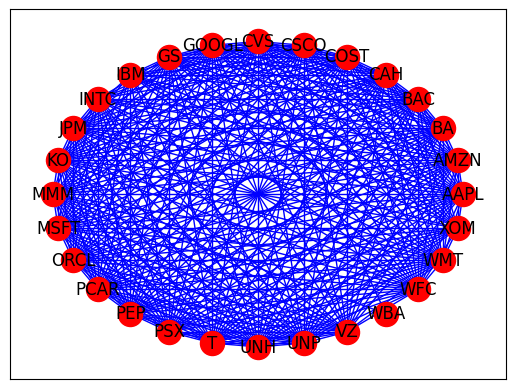

In [64]:

nx.draw_networkx(Graph_spearman, pos=nx.circular_layout(Graph_spearman), node_color='r', edge_color='b')

In [65]:
all_stock_nodes = df_s_transpose_spearman.index.to_list()
all_stock_nodes

['AAPL',
 'AMZN',
 'BA',
 'BAC',
 'CAH',
 'COST',
 'CSCO',
 'CVS',
 'GOOGL',
 'GS',
 'IBM',
 'INTC',
 'JPM',
 'KO',
 'MMM',
 'MSFT',
 'ORCL',
 'PCAR',
 'PEP',
 'PSX',
 'T',
 'UNH',
 'UNP',
 'VZ',
 'WBA',
 'WFC',
 'WMT',
 'XOM']

In [66]:
source = [];
target = [];
edge_feature = [];

for aStock in all_stock_nodes:
    for anotherStock in all_stock_nodes:
        if df_s_transpose_spearman[aStock][anotherStock] > 0:
            #print(df_s_transpose_spearman[aStock][anotherStock])
            source.append(aStock)
            target.append(anotherStock)
            edge_feature.append(1)

source, target, edge_feature

(['AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',


In [68]:
spearman_edges = pd.DataFrame(
    {"source": source, "target": target})

In [69]:
spearman_edges_data = pd.DataFrame(
    {"source": source, "target": target, "edge_feature": edge_feature}
)


spearman_edges[:10]


,source,target
0,AAPL,AMZN
1,AAPL,BA
2,AAPL,BAC
3,AAPL,CAH
4,AAPL,COST
5,AAPL,CSCO
6,AAPL,CVS
7,AAPL,GOOGL
8,AAPL,GS
9,AAPL,IBM


In [70]:
df_s_transpose
df_s_transpose_feature = df_s_transpose.reset_index(drop = True, inplace = False)
# df_s_transpose_feature =  df_s_transpose_feature.values.tolist()
# print(df_s_transpose_feature.values.tolist())
#df_s_transpose_feature['WY'].values
df_s_transpose_feature['AAPL'].values


array([  6.42460346,   6.43571234,   6.33334446, ..., 200.1927948 ,
       199.72332764, 200.62231445])

In [71]:
node_Data = [];
for x in all_stock_nodes:
    node_Data.append( df_s_transpose_feature[x].values)


node_Data


[array([  6.42460346,   6.43571234,   6.33334446, ..., 200.1927948 ,
        199.72332764, 200.62231445]),
 array([  6.69500017,   6.73449993,   6.61250019, ..., 204.72000122,
        205.69999695, 205.00999451]),
 array([ 43.77755737,  45.21134567,  46.58280945, ..., 201.5       ,
        208.17999268, 207.32000732]),
 array([12.30046749, 12.70029163, 12.84924507, ..., 43.80187607,
        43.98082352, 43.87146759]),
 array([ 21.75043488,  21.55653381,  21.20215797, ..., 152.66423035,
        153.5216217 , 153.97024536]),
 array([  42.22155762,   42.0936203 ,   42.64085388, ..., 1011.73834229,
        1007.34442139, 1038.7409668 ]),
 array([16.15816879, 16.08617973, 15.98146057, ..., 62.96138   ,
        62.67311478, 62.66317368]),
 array([22.69670677, 22.60724449, 22.40766144, ..., 61.77626419,
        62.10269928, 63.34910965]),
 array([ 15.59093094,  15.52227306,  15.13097572, ..., 172.15159607,
        171.65219116, 171.53234863]),
 array([131.99201965, 134.32554626, 132.89183044,

In [72]:
spearman_graph_node_data = pd.DataFrame(node_Data, index = all_stock_nodes)
spearman_graph_node_data



,0,1,2,3,4,5,6,7,8,9,...,3866,3867,3868,3869,3870,3871,3872,3873,3874,3875
AAPL,6.424603,6.435712,6.333344,6.321636,6.363664,6.307528,6.235779,6.323739,6.287113,6.182042,...,211.020508,208.543320,206.625504,201.860901,201.131729,195.048645,199.983047,200.192795,199.723328,200.622314
AMZN,6.695000,6.734500,6.612500,6.500000,6.676000,6.515500,6.367500,6.455500,6.367500,6.357000,...,205.589996,206.160004,204.070007,201.119995,203.100006,200.990005,206.020004,204.720001,205.699997,205.009995
BA,43.777557,45.211346,46.582809,48.468552,48.001022,47.432178,47.089306,47.658134,47.969841,47.393223,...,205.820007,205.250000,207.669998,203.210007,203.410004,202.360001,201.029999,201.500000,208.179993,207.320007
BAC,12.300467,12.700292,12.849245,13.272586,13.154993,13.272586,12.825728,13.029557,13.186356,12.747328,...,44.428185,44.507717,44.428185,42.996620,43.056271,42.946915,43.960938,43.801876,43.980824,43.871468
CAH,21.750435,21.556534,21.202158,21.195469,21.128614,21.409435,21.282396,21.402748,21.810616,21.623394,...,153.780823,153.392014,154.299240,152.843674,152.026184,152.285385,154.209503,152.664230,153.521622,153.970245
COST,42.221558,42.093620,42.640854,42.434738,42.129150,42.178909,41.951488,42.214447,41.731182,41.780933,...,1024.410767,1032.908936,1035.385498,1023.881592,1016.721436,1007.104736,1016.381897,1011.738342,1007.344421,1038.740967
CSCO,16.158169,16.086180,15.981461,16.053453,16.138533,16.092726,15.837487,16.125443,16.328323,15.968379,...,63.239704,63.537910,63.040901,62.822220,62.981262,62.732758,63.368931,62.961380,62.673115,62.663174
CVS,22.696707,22.607244,22.407661,23.233503,23.398670,23.350491,23.095867,23.378023,23.364264,23.336735,...,61.855396,62.102699,63.052345,61.439930,59.570320,60.173740,60.678238,61.776264,62.102699,63.349110
GOOGL,15.590931,15.522273,15.130976,14.778734,14.975753,14.953115,14.688684,14.604354,14.673012,14.427985,...,165.989059,166.338623,163.781723,168.356186,170.663391,168.266296,172.690933,172.151596,171.652191,171.532349
GS,131.992020,134.325546,132.891830,135.492340,132.929993,130.832840,127.980698,128.933914,128.522156,125.990295,...,615.959778,609.263062,603.511780,590.516541,595.262878,595.571350,612.676086,605.422241,601.859985,600.450012


In [73]:
spearman_graph_with_node_features = StellarGraph(spearman_graph_node_data, edges = spearman_edges, node_type_default = "corner", edge_type_default = "line")
print(pearson_graph_with_node_features.info())


StellarGraph: Undirected multigraph
 Nodes: 28, Edges: 604

 Node types:
  corner: [28]
    Features: float32 vector, length 3876
    Edge types: corner-line->corner

 Edge types:
    corner-line->corner: [604]
        Weights: all 1 (default)
        Features: none


In [75]:
from stellargraph.mapper import FullBatchNodeGenerator

generator = FullBatchNodeGenerator(spearman_graph_with_node_features, method = "gcn") # , sparse = False
vars(generator)

Using GCN (local pooling) filters...


{'graph': <stellargraph.core.graph.StellarGraph at 0x7b2b7cff2960>,
 'name': None,
 'k': 1,
 'teleport_probability': 0.1,
 'method': 'gcn',
 'node_list': Index(['AAPL', 'AMZN', 'BA', 'BAC', 'CAH', 'COST', 'CSCO', 'CVS', 'GOOGL',
        'GS', 'IBM', 'INTC', 'JPM', 'KO', 'MMM', 'MSFT', 'ORCL', 'PCAR', 'PEP',
        'PSX', 'T', 'UNH', 'UNP', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM'],
       dtype='object'),
 'Aadj': <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 712 stored elements and shape (28, 28)>,
 'use_sparse': True,
 'features': array([[  6.4246035,   6.4357123,   6.3333445, ..., 200.1928   ,
         199.72333  , 200.62231  ],
        [  6.695    ,   6.7345   ,   6.6125   , ..., 204.72     ,
         205.7      , 205.01     ],
        [ 43.777557 ,  45.211346 ,  46.58281  , ..., 201.5      ,
         208.18     , 207.32     ],
        ...,
        [ 18.120777 ,  18.618229 ,  18.644768 , ...,  73.29939  ,
          74.07484  ,  74.343254 ],
        [ 12.98679  ,  12.85747

In [76]:
train_subjects, test_subjects = model_selection.train_test_split(
    spearman_graph_node_data #, train_size = 6, test_size = 4
)

In [77]:
val_subjects, test_subjects_step_2 = model_selection.train_test_split(
    test_subjects #, test_size = 2
)


In [78]:
train_subjects.shape, test_subjects.shape, val_subjects.shape, test_subjects_step_2.shape

((21, 3876), (7, 3876), (5, 3876), (2, 3876))

In [79]:
spearman_graph_node_data

,0,1,2,3,4,5,6,7,8,9,...,3866,3867,3868,3869,3870,3871,3872,3873,3874,3875
AAPL,6.424603,6.435712,6.333344,6.321636,6.363664,6.307528,6.235779,6.323739,6.287113,6.182042,...,211.020508,208.543320,206.625504,201.860901,201.131729,195.048645,199.983047,200.192795,199.723328,200.622314
AMZN,6.695000,6.734500,6.612500,6.500000,6.676000,6.515500,6.367500,6.455500,6.367500,6.357000,...,205.589996,206.160004,204.070007,201.119995,203.100006,200.990005,206.020004,204.720001,205.699997,205.009995
BA,43.777557,45.211346,46.582809,48.468552,48.001022,47.432178,47.089306,47.658134,47.969841,47.393223,...,205.820007,205.250000,207.669998,203.210007,203.410004,202.360001,201.029999,201.500000,208.179993,207.320007
BAC,12.300467,12.700292,12.849245,13.272586,13.154993,13.272586,12.825728,13.029557,13.186356,12.747328,...,44.428185,44.507717,44.428185,42.996620,43.056271,42.946915,43.960938,43.801876,43.980824,43.871468
CAH,21.750435,21.556534,21.202158,21.195469,21.128614,21.409435,21.282396,21.402748,21.810616,21.623394,...,153.780823,153.392014,154.299240,152.843674,152.026184,152.285385,154.209503,152.664230,153.521622,153.970245
COST,42.221558,42.093620,42.640854,42.434738,42.129150,42.178909,41.951488,42.214447,41.731182,41.780933,...,1024.410767,1032.908936,1035.385498,1023.881592,1016.721436,1007.104736,1016.381897,1011.738342,1007.344421,1038.740967
CSCO,16.158169,16.086180,15.981461,16.053453,16.138533,16.092726,15.837487,16.125443,16.328323,15.968379,...,63.239704,63.537910,63.040901,62.822220,62.981262,62.732758,63.368931,62.961380,62.673115,62.663174
CVS,22.696707,22.607244,22.407661,23.233503,23.398670,23.350491,23.095867,23.378023,23.364264,23.336735,...,61.855396,62.102699,63.052345,61.439930,59.570320,60.173740,60.678238,61.776264,62.102699,63.349110
GOOGL,15.590931,15.522273,15.130976,14.778734,14.975753,14.953115,14.688684,14.604354,14.673012,14.427985,...,165.989059,166.338623,163.781723,168.356186,170.663391,168.266296,172.690933,172.151596,171.652191,171.532349
GS,131.992020,134.325546,132.891830,135.492340,132.929993,130.832840,127.980698,128.933914,128.522156,125.990295,...,615.959778,609.263062,603.511780,590.516541,595.262878,595.571350,612.676086,605.422241,601.859985,600.450012


In [80]:
train_targets = train_subjects;
val_targets = val_subjects;
test_targets = test_subjects;

In [81]:

train_gen = generator.flow(train_subjects.index, train_targets)

In [82]:
train_subjects.index,
train_targets

,0,1,2,3,4,5,6,7,8,9,...,3866,3867,3868,3869,3870,3871,3872,3873,3874,3875
COST,42.221558,42.093620,42.640854,42.434738,42.129150,42.178909,41.951488,42.214447,41.731182,41.780933,...,1024.410767,1032.908936,1035.385498,1023.881592,1016.721436,1007.104736,1016.381897,1011.738342,1007.344421,1038.740967
KO,17.692511,17.478495,17.472294,17.428869,17.106289,17.453682,17.642891,17.689417,17.720436,17.459885,...,71.491692,71.422188,71.183884,71.342751,70.637764,71.263313,71.273247,70.647697,70.985291,71.590988
ORCL,20.104776,20.080509,19.789249,19.724531,19.967228,19.975328,19.870150,20.064320,20.542625,20.461552,...,160.149704,159.301498,159.970078,156.846710,156.976440,155.639282,161.566696,163.502579,162.554581,165.179016
CVS,22.696707,22.607244,22.407661,23.233503,23.398670,23.350491,23.095867,23.378023,23.364264,23.336735,...,61.855396,62.102699,63.052345,61.439930,59.570320,60.173740,60.678238,61.776264,62.102699,63.349110
PSX,21.668587,21.668587,21.668587,21.668587,21.668587,21.668587,21.668587,21.668587,21.668587,21.668587,...,123.313499,120.986450,119.718956,110.688042,111.876328,112.024857,113.213135,111.668373,113.559715,112.371445
CSCO,16.158169,16.086180,15.981461,16.053453,16.138533,16.092726,15.837487,16.125443,16.328323,15.968379,...,63.239704,63.537910,63.040901,62.822220,62.981262,62.732758,63.368931,62.961380,62.673115,62.663174
WFC,18.120777,18.618229,18.644768,19.321304,19.142225,19.102428,18.624878,18.956507,19.228456,18.624878,...,75.735085,75.615776,75.078934,72.762543,72.961372,72.404648,73.557869,73.299393,74.074837,74.343254
IBM,73.283340,72.398064,71.927757,71.678795,72.398064,71.640068,72.209969,72.055023,73.205856,72.912628,...,264.968536,266.607452,265.157257,259.118073,256.634857,256.893127,261.462219,258.492279,256.952728,257.320221
INTC,13.519424,13.512952,13.467630,13.338131,13.487052,13.564748,13.344611,13.571231,13.907916,13.467630,...,21.660000,21.379999,21.270000,20.690001,20.549999,20.049999,20.549999,20.370001,20.250000,19.549999
BAC,12.300467,12.700292,12.849245,13.272586,13.154993,13.272586,12.825728,13.029557,13.186356,12.747328,...,44.428185,44.507717,44.428185,42.996620,43.056271,42.946915,43.960938,43.801876,43.980824,43.871468


In [86]:
unit_count = train_subjects.shape[0]
unit_count

from stellargraph.layer import GCN

layer_sizes = [32, 32]


from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow import keras

layer_sizes = [32, 32]
activations = ["relu", "relu"]


gcn = GCN(layer_sizes = layer_sizes, activations = activations, generator = generator) #, dropout = 0.5
x_inp, x_out = gcn.in_out_tensors()

# MLP -- Regression
predictions = layers.Dense(units = train_targets.shape[1], activation = "linear")(x_out)


x_out,
x_inp, x_out


# # hard coded size adjustments
#test_subjects_adjusted = test_subjects[:len(val_subjects)]
#
# val_gen = generator.flow(val_subjects.index, test_subjects_adjusted)
# # train_gen[1], val_gen[1]


([<KerasTensor shape=(1, 28, 3876), dtype=float32, sparse=False, ragged=False, name=keras_tensor_50>,
  <KerasTensor shape=(1, None), dtype=int32, sparse=False, ragged=False, name=keras_tensor_51>,
  <KerasTensor shape=(1, None, 2), dtype=int64, sparse=False, ragged=False, name=keras_tensor_52>,
  <KerasTensor shape=(1, None), dtype=float32, sparse=False, ragged=False, name=keras_tensor_53>],
 <KerasTensor shape=(1, None, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_59>)

In [87]:
model = Model(
    inputs = x_inp, outputs = predictions
)

In [90]:
from tensorflow.keras import losses

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.1),
    loss=losses.MeanSquaredError(),
    metrics=["acc"],
)

In [92]:
model.compile(
    loss = 'mean_absolute_error',
    optimizer = optimizers.Adam(learning_rate = 0.015),
    #optimizer = optimizers.Adam(lr_fn),
    # metrics=['mean_squared_error']
    metrics=['mean_squared_error', 'mae', 'mape']
    # metrics=[
    #    metrics.MeanSquaredError(),
    #    metrics.AUC(),
    #]
)


In [93]:
len(x_inp), predictions.shape, print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (1, 28, 3876)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_16      │ (1, None, 2)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_17      │ (1, None)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (1, 28, 3876)     │          0 │ input_layer_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ squeezed_sparse_co… │ (28, 28)          │          0 │ input_layer_16[0… │
│ (SqueezedSparseCon… │                   │            │ input_layer_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ graph_convolution_… │ (1, 28, 32)       │    124,064 │ dropout_4[0][0],  │
│ (GraphConvolution)  │                   │            │ squeezed_sparse_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (1, 28, 32)       │          0 │ graph_convolutio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ graph_convolution_… │ (1, 28, 32)       │      1,056 │ dropout_5[0][0],  │
│ (GraphConvolution)  │                   │            │ squeezed_sparse_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_15      │ (1, None)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gather_indices_1    │ (1, None, 32)     │          0 │ graph_convolutio… │
│ (GatherIndices)     │                   │            │ input_layer_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (1, None, 3876)   │    127,908 │ gather_indices_1… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 253,028 (988.39 KB)

 Trainable params: 253,028 (988.39 KB)

 Non-trainable params: 0 (0.00 B)

None


(4, (1, None, 3876), None)

In [94]:

len(val_subjects)
test_subjects_ = test_subjects[:len(val_subjects)]

In [95]:
test_subjects_ = test_subjects[:len(val_subjects)]

val_gen = generator.flow(val_subjects.index, test_subjects_)

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

In [99]:
epochs_to_test = 10000
patience_to_test = 10000

es_callback = EarlyStopping(
    monitor = "val_mean_squared_error",
    patience = patience_to_test,
    restore_best_weights = True
)

data_valid = val_gen [:1][:4];
train_gen_data = train_gen [:1][:4];
history = model.fit( train_gen_data, epochs = epochs_to_test, validation_data = data_valid, verbose = 2,
    # shuffling = true means shuffling the whole graph
    shuffle = False, callbacks = [es_callback],
)

Epoch 1/10000


ValueError: Layer "functional_3" expects 4 input(s), but it received 5 input tensors. Inputs received: [<tf.Tensor 'data:0' shape=(None, 28, 3876) dtype=float32>, <tf.Tensor 'data_1:0' shape=(None, 21) dtype=uint8>, <tf.Tensor 'data_2:0' shape=(None, 712, 2) dtype=int64>, <tf.Tensor 'data_3:0' shape=(None, 712) dtype=float32>, <tf.Tensor 'data_4:0' shape=(None, 21, 3876) dtype=float32>]